**IMPORT LIBRARIES**

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    MaxPooling2D,
    BatchNormalization,
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

**LOADING DATA**

In [15]:
train_dir = '../input/asl-alphabet/asl_alphabet_train/asl_alphabet_train'
test_dir = '../input/asl-alphabet/asl_alphabet_test/asl_alphabet_test'

In [16]:
def get_data(data_dir) :
    images = []
    labels = []
    
    dir_list = os.listdir(data_dir)
    for i in range(len(dir_list)):
        print("Loading Folder ",i)
        for image in os.listdir(data_dir + "/" + dir_list[i]):
            img = cv2.imread(data_dir + '/' + dir_list[i] + '/' + image)
            img = cv2.resize(img, (32, 32))
            images.append(img)
            labels.append(i)
    
    return images, labels
        
X, y = get_data(train_dir)

Loading Folder  0
Loading Folder  1
Loading Folder  2
Loading Folder  3
Loading Folder  4
Loading Folder  5
Loading Folder  6
Loading Folder  7
Loading Folder  8
Loading Folder  9
Loading Folder  10
Loading Folder  11
Loading Folder  12
Loading Folder  13
Loading Folder  14
Loading Folder  15
Loading Folder  16
Loading Folder  17
Loading Folder  18
Loading Folder  19
Loading Folder  20
Loading Folder  21
Loading Folder  22
Loading Folder  23
Loading Folder  24
Loading Folder  25
Loading Folder  26
Loading Folder  27
Loading Folder  28


**NORMALIZATION AND ONE HOT ENCODING**

In [17]:
def preprocess_data(X, y):
    np_X = np.array(X)
    normalised_X = np_X.astype('float32') / 255.0

    label_encoded_y = utils.to_categorical(y)

    x_train, x_test, y_train, y_test = train_test_split(normalised_X, label_encoded_y, test_size=0.1)

    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = preprocess_data(X, y)

print("Training data:", x_train.shape)
print("Test data:", x_test.shape)


Training data: (78300, 32, 32, 3)
Test data: (8700, 32, 32, 3)


**DEFINING THE CLASSES**

In [18]:
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

**DEFINING THE MODEL**

In [19]:
classes = len(classes)
batch = 32
epochs = 15
learning_rate = 0.001


double cnn

In [20]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())  # Flatten the output from Layer 1

# Layer 2: Symbol Detection
model.add(Dense(128, activation="relu"))

# No Dropout for simplicity

# Final Classification Layer
model.add(Dense(classes, activation="softmax"))

# Compile the model
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 16)        2320      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

**TRAIN MODEL**

In [21]:
history = model.fit(
    x_train, y_train,
    batch_size=batch,
    epochs=epochs,
    validation_data=(x_test, y_test),
    verbose=1
)


Epoch 1/15
2447/2447 [==============================] - 45s 18ms/step - loss: 1.1056 - accuracy: 0.6618 - val_loss: 0.4981 - val_accuracy: 0.8330
Epoch 2/15
2447/2447 [==============================] - 43s 18ms/step - loss: 0.2534 - accuracy: 0.9172 - val_loss: 0.1849 - val_accuracy: 0.9405
Epoch 3/15
2447/2447 [==============================] - 43s 17ms/step - loss: 0.1258 - accuracy: 0.9591 - val_loss: 0.1092 - val_accuracy: 0.9653
Epoch 4/15
2447/2447 [==============================] - 43s 18ms/step - loss: 0.0887 - accuracy: 0.9703 - val_loss: 0.1045 - val_accuracy: 0.9617
Epoch 5/15
2447/2447 [==============================] - 43s 17ms/step - loss: 0.0689 - accuracy: 0.9777 - val_loss: 0.0549 - val_accuracy: 0.9816
Epoch 6/15
2447/2447 [==============================] - 42s 17ms/step - loss: 0.0548 - accuracy: 0.9815 - val_loss: 0.0465 - val_accuracy: 0.9852
Epoch 7/15
2447/2447 [==============================] - 43s 17ms/step - loss: 0.0468 - accuracy: 0.9842 - val_loss: 0.0389 -

**MODEL EVALUATION**

In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)


272/272 [==============================] - 2s 6ms/step - loss: 0.0666 - accuracy: 0.9800
Test accuracy: 0.9800000190734863
Test loss: 0.06660023331642151


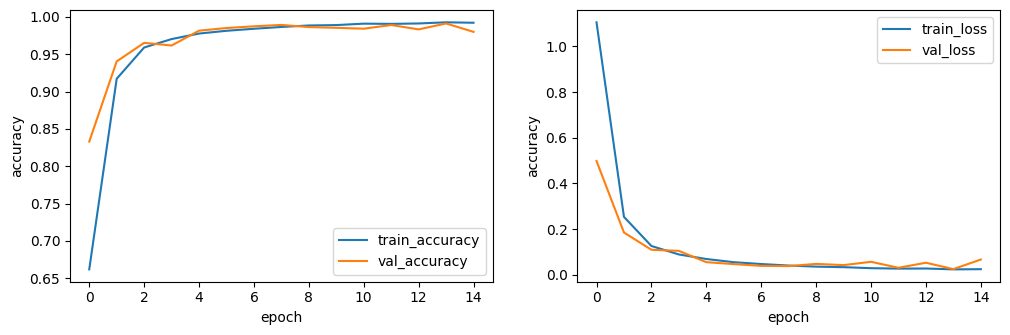

In [23]:
def plot_results(model):

  plt.figure(figsize=(12, 12))
  plt.subplot(3, 2, 1)
  plt.plot(history.history['accuracy'], label = 'train_accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.subplot(3, 2, 2)
  plt.plot(history.history['loss'], label = 'train_loss')
  plt.plot(history.history['val_loss'], label = 'val_loss')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()


    
plot_results(model)